C:\Users\karti\AppData\Local\Temp\ipykernel_32860\3351541129.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("Fremont_Bridge_Hourly_Bicycle_Counts.csv",


RMSE: 58.92
R² Score: 0.8


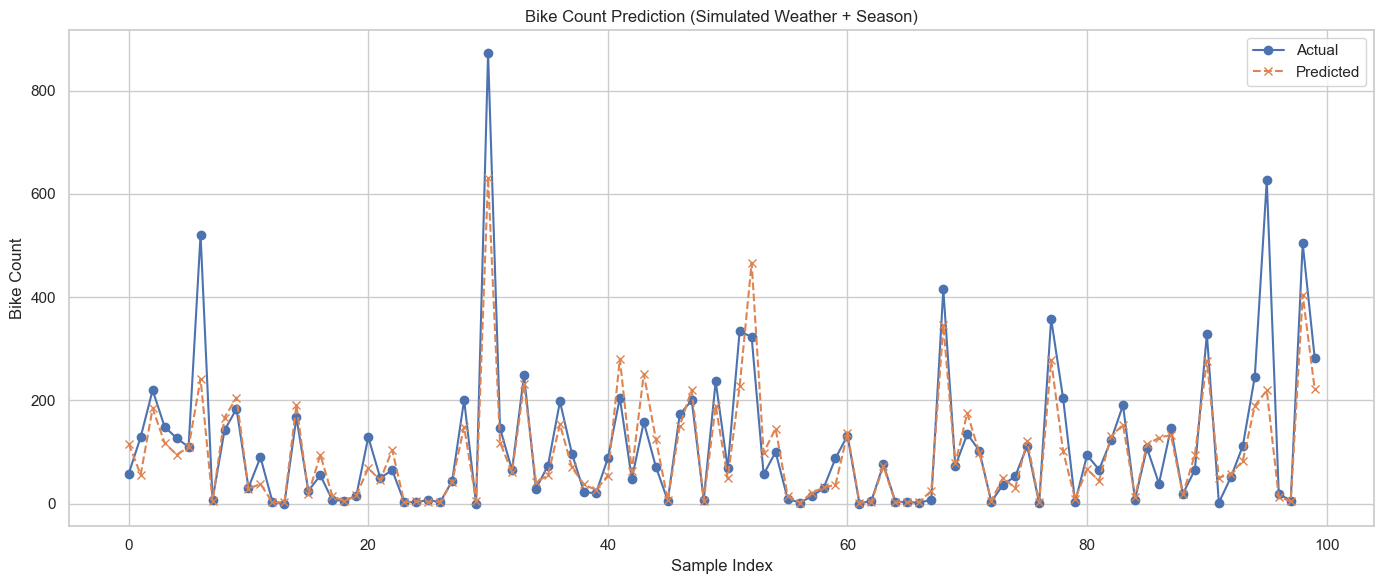

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Load Bike Count Data
# -------------------------------
df = pd.read_csv("Fremont_Bridge_Hourly_Bicycle_Counts.csv",
                 parse_dates=["Date"],
                 date_parser=lambda x: pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p"))

# -------------------------------
# Process Bike Counts
# -------------------------------
if "Fremont Bridge Sidewalks, south of N 34th St Total" in df.columns:
    df["total_bikes"] = df["Fremont Bridge Sidewalks, south of N 34th St Total"].fillna(0)
else:
    df["total_bikes"] = df.iloc[:, 1:].sum(axis=1)

# -------------------------------
# Time Features
# -------------------------------
df["hour"] = df["Date"].dt.hour
df["dayofweek"] = df["Date"].dt.dayofweek
df["month"] = df["Date"].dt.month
df["is_weekend"] = (df["dayofweek"] >= 5).astype(int)

# -------------------------------
# Season Feature
# -------------------------------
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["season"] = df["month"].apply(get_season)

# -------------------------------
# Simulated Weather Data
# -------------------------------
# TMAX: Max temperature (rough approximation)
np.random.seed(42)




# -------------------------------
# One-hot Encode Season
# -------------------------------
df = pd.get_dummies(df, columns=["season"], drop_first=True)

# -------------------------------
# Modeling
# -------------------------------
feature_cols = ["hour", "dayofweek", "month", "is_weekend",
                "season_Spring", "season_Summer", "season_Winter"]
X = df[feature_cols]
y = df["total_bikes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 2)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label="Actual", marker='o')
plt.plot(y_pred[:100], label="Predicted", linestyle="--", marker='x')
plt.title("Bike Count Prediction (Simulated Weather + Season)")
plt.xlabel("Sample Index")
plt.ylabel("Bike Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\karti\AppData\Local\Temp\ipykernel_32860\2350428475.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="hour", y="total_bikes", estimator="mean", ci=None)


<Figure size 1000x600 with 0 Axes>

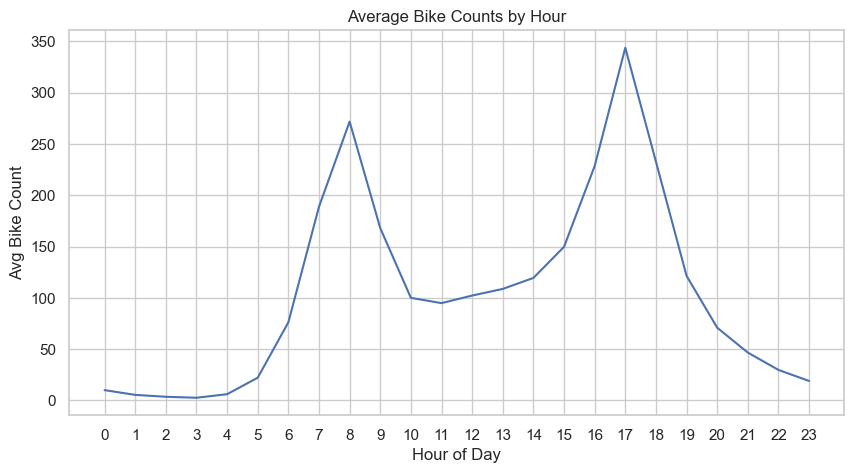

C:\Users\karti\AppData\Local\Temp\ipykernel_32860\2350428475.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["dayofweek"], y=df["total_bikes"], estimator="mean", ci=None)


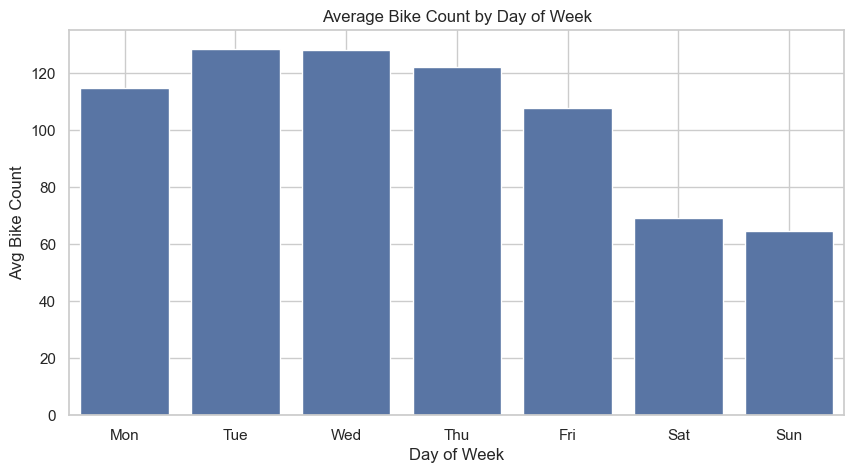

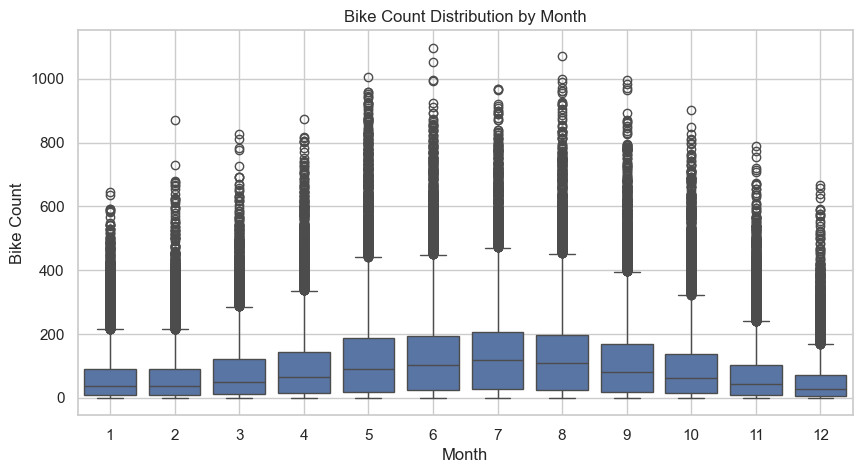

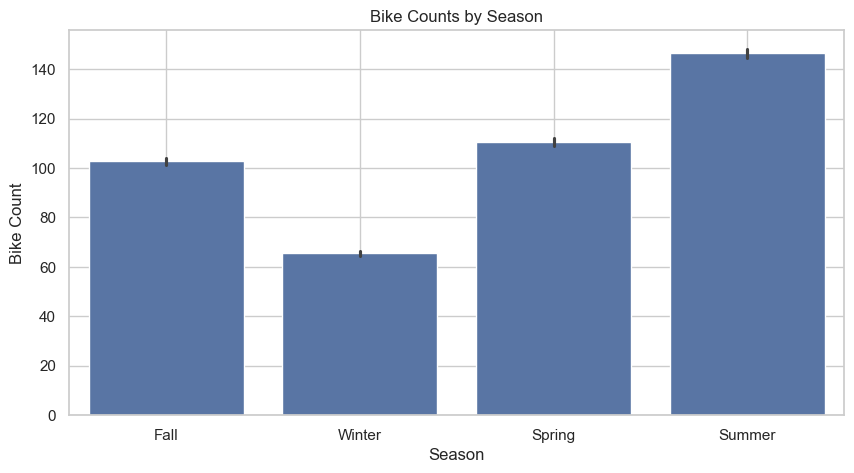

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

df["season"] = df["month"].apply(get_season)

# 1. Hourly Trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="hour", y="total_bikes", estimator="mean", ci=None)
plt.title("Average Bike Counts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Bike Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# 2. Weekday Trend
plt.figure(figsize=(10, 5))
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sns.barplot(x=df["dayofweek"], y=df["total_bikes"], estimator="mean", ci=None)
plt.title("Average Bike Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Avg Bike Count")
plt.xticks(ticks=range(7), labels=day_names)
plt.grid(True)
plt.show()

# 3. Monthly/Seasonal Trends
plt.figure(figsize=(10, 5))
sns.boxplot(x="month", y="total_bikes", data=df)
plt.title("Bike Count Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Bike Count")
plt.grid(True)
plt.show()





# 6. Boxplot by Season
plt.figure(figsize=(10, 5))
sns.barplot(x="season", y="total_bikes", data=df)
plt.title("Bike Counts by Season")
plt.xlabel("Season")
plt.ylabel("Bike Count")
plt.grid(True)
plt.show()